C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


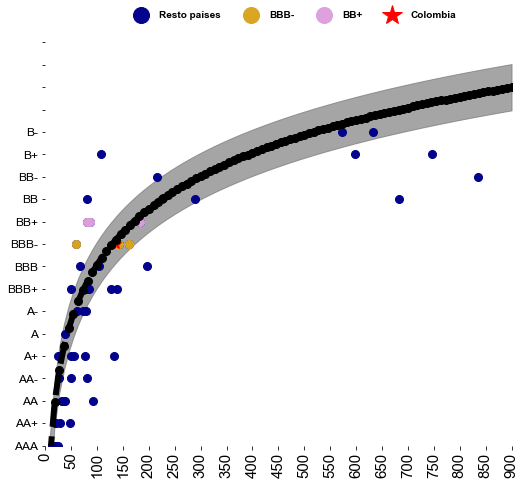

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import median_absolute_error
from matplotlib.gridspec import  GridSpec
from pandas.plotting import scatter_matrix
from scipy.optimize import curve_fit


df_countries = pd.read_csv('D:/andrgome/Documents/BDPython/BD_CDS_COUNTRY.csv',encoding='latin-1')
df_countries.sort_values(by=['Actual Credit Rating'],inplace=True)

#Gráfico
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=20)
tick_spacing1 = 5
tick_spacing2 = 50


#GRÁFICO DE CDS POR PAÍSES

tick_spacing3 = 1
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=10)

conditions = [
    (df_countries['Actual Credit Rating'] == 1),
    (df_countries['Actual Credit Rating'] == 2),
    (df_countries['Actual Credit Rating'] == 3),
    (df_countries['Actual Credit Rating'] == 4),
    (df_countries['Actual Credit Rating'] == 5),
    (df_countries['Actual Credit Rating'] == 6),
    (df_countries['Actual Credit Rating'] == 7),
    (df_countries['Actual Credit Rating'] == 8),
    (df_countries['Actual Credit Rating'] == 9),
    (df_countries['Actual Credit Rating'] == 10),
    (df_countries['Actual Credit Rating'] == 11),
    (df_countries['Actual Credit Rating'] == 12),
    (df_countries['Actual Credit Rating'] == 13),
    (df_countries['Actual Credit Rating'] == 14),
    (df_countries['Actual Credit Rating'] == 15),
    (df_countries['Actual Credit Rating'] == 16),
    (df_countries['Actual Credit Rating'] == 17),
]  
     
choices = ["AAA","AA+","AA","AA-","A+","A","A-","BBB+","BBB","BBB-","BB+","BB","BB-","B+","B","B-","CCC+"]
df_countries['CALIF'] = np.select(conditions, choices, default='null')

df_BBBmenos = df_countries.loc[df_countries['CALIF'].isin(['BBB-'])]
df_BBmas = df_countries.loc[df_countries['CALIF'].isin(['BB+'])]
df_Colombia = df_countries.loc[df_countries['Country'].isin(['Colombia'])]


def logarit(x, a, b, c):
    y = a * np.log(b * x) + c
    return y

x = df_countries['CDS 5yr']
y = df_countries['Actual Credit Rating']

popt, pcov = curve_fit(logarit, x, y)
y_pred = logarit(x, *popt)
MAE = median_absolute_error(y, y_pred)


x_ajust = np.linspace(0, 900, 100)
y_ajust = logarit(x_ajust, *popt)

banda_superior = y_ajust + MAE
banda_inferior = y_ajust - MAE

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(df_countries['CDS 5yr'],df_countries['CALIF'],marker='o', linestyle='None',linewidth=5,color='darkblue',alpha=0.99,label='Resto países',markersize=8)
ax1.plot(df_BBBmenos['CDS 5yr'],df_BBBmenos['CALIF'],marker='o', linestyle='None',linewidth=5,color='goldenrod',alpha=0.99,label='BBB-',markersize=8)
ax1.plot(df_BBmas['CDS 5yr'],df_BBmas['CALIF'],marker='o', linestyle='None',linewidth=5,color='plum',alpha=0.99,label='BB+',markersize=8)
ax1.plot(df_Colombia['CDS 5yr'],df_Colombia['CALIF'],marker='*', linestyle='None',linewidth=5,color='red',alpha=0.99,label='Colombia',markersize=10)
ax1.plot(x_ajust,y_ajust,marker='o', linestyle='dashed',linewidth=6,color='black',alpha=0.99,label=None,markersize=8)
ax1.fill_between(x_ajust,banda_inferior,banda_superior,color='dimgrey', alpha= 0.6)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.9, 1.1),ncol=10,markerscale=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing3))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=12)
plt.xticks(fontname = "Arial",fontsize=15)
ax1.title.set_fontfamily('arial')
plt.axis([0, 900, 0, 18])
plt.box(on=None)

plt.subplots_adjust(bottom=0.1, right=2.5, top=1.5)
plt.show()



In [13]:
banda_superior

array([       -inf,  0.46391873,  2.96392153,  4.42632943,  5.46392434,
        6.26874548,  6.92633223,  7.48231391,  7.96392714,  8.38874012,
        8.76874828,  9.11250748,  9.42633503,  9.7150284 ,  9.98231671,
       10.23115617, 10.46392995, 10.6825873 , 10.88874293, 11.08374943,
       11.26875109, 11.4447246 , 11.61251028, 11.77283631, 11.92633784,
       12.07357223, 12.21503121, 12.35115082, 12.48231952, 12.60888484,
       12.73115898, 12.8494234 , 12.96393275, 13.07491817, 13.1825901 ,
       13.28714066, 13.38874573, 13.48756675, 13.58375223, 13.6774391 ,
       13.76875389, 13.85781377, 13.94472741, 14.02959583, 14.11251309,
       14.19356687, 14.27283911, 14.35040644, 14.42634064, 14.50070909,
       14.57357503, 14.64499799, 14.71503401, 14.78373593, 14.85115362,
       14.91733423, 14.98232232, 15.04616012, 15.10888764, 15.17054285,
       15.23116178, 15.29077871, 15.3494262 , 15.4071353 , 15.46393556,
       15.51985515, 15.57492098, 15.62915872, 15.6825929 , 15.73